<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/01_19_autoencoder_%EC%9D%B4%EC%83%81_%EA%B0%90%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인코딩(encoding)과 디코딩(decoding)

- 인코딩-디코딩 아키텍쳐는 통신, 암호, 전자 등 다양한 분야에 적용되는 일반적인 프레임워크

- 인코더는 입력 샘플을 잠재 공간, 즉 인코더에 의해 정의된 숨겨진 구조화된 값 집합에 매핑(빨간색 부분)하는 함수

- 디코더는 이 잠재 공간의 요소를 사전 정의된 타겟 도메인으로 매핑하는 여함수
 - 즉, 다시 출력하는 형태로 바꿔준다는 뜻이다.

- 예를 들어, 이미지와 오디오 압축 포맷

  - JPEG 도구는 미디어 파일을 가벼운 이진파일로 압축하여 인코딩하고, 표시할 떄 픽셀 값을 복원하기 위해 디코딩

  <img src="https://image.slidesharecdn.com/aes171113-180510014736/95/-48-638.jpg?cb=1525916931">

  <sub>[이미지 출처] https://www.slideshare.net/NaverEngineering/ss-96581209</sub>

# 오토인코더(Autoencoder, AE)

- 입력을 저차원 잠재공간으로 인코딩한 후 디코딩하여 복원하는 네트워크  
  즉, 이미지를 입력받아 인코더 모듈을 사용하여 잠재 벡터 공간으로 매핑하고,  
  디코더 모듈을 사용하여 원본 이미지와 동일한 차원으로 복원하여 출력

- 원본 입력을 재구성하는 방법으로 학습

- 고전적인 방식은 구조화가 잘된 잠재 공간을 만들지 못하고,  
  압축도 뛰어나지 않음

  <img src="https://miro.medium.com/max/1200/1*nqzWupxC60iAH2dYrFT78Q.png">

  <sub>[이미지 출처] https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f</sub>

autoencoder는 입력을 출력에 복사하도록 훈련된 특수한 유형의 신경망이다.

예를 들어, 손으로 숫자의 이미지가 주어지면 autoencoder는 먼저 이미지를 더 낮은 차원의 잠재 표현으로 인코딩한 다음 잠재 표현으로 인코딩한 다음 잠재 표현을 다시 이미지로 디코딩한다.

autoencoder는 재구성 오류를 최소화하면서 데이터를 압축하는 방법을 학습한다.

# TensorFlow 및 기타 라이브러리 가져오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# 데이터세트 로드하기
시작하려면 FASHION MNIST 데이터세트를 사용하여 기본 AUTOENCODER를 훈련한다.

이 데이터세트의 각 이미지는 28X28 픽셀이다.

In [5]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## 첫 번째 예: 기본 autoencoder

[기본 오토 인코더 결과](https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/generative/images/intro_autoencoder_result.png?raw=1)

두 개의 Dense 레이어로 autoencoder를 정의합니다. 이미지를 64차원 잠재 벡터로 압축하는 `encoder`와 잠재 공간에서 원본 이미지를 재구성하는 `decoder`입니다.

모델을 정의하려면 [Keras Model Subclassing API](https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/generative/autoencoder.ipynb)를 사용하세요.

In [7]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim)

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

x_train을 입력과 대상으로 사용하여 모델을 훈련한다.

encoder는 데이터 세트를 784 차원에서 잠재 공간으로 압축하는 방법을 배우고,

decoder는 원본 이미지를 재구성하는 방법을 배운다.

In [9]:
autoencoder.fit(x_train, x_train, 
                epochs=10, 
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.0237 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

둘다 x 데이터(x_train)를 넣는다.

레이블값을 입력값과 똑같이 넣어주며 이렇게 학습 시킨다.

validation_data 역시 마찬가지이다.

모델이 훈련되었으므로 테스트 세트에서 이미지를 인코딩 및 디코딩하여 테스트해 보겠다.

In [10]:
# 이미지 출력을 위함임.
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

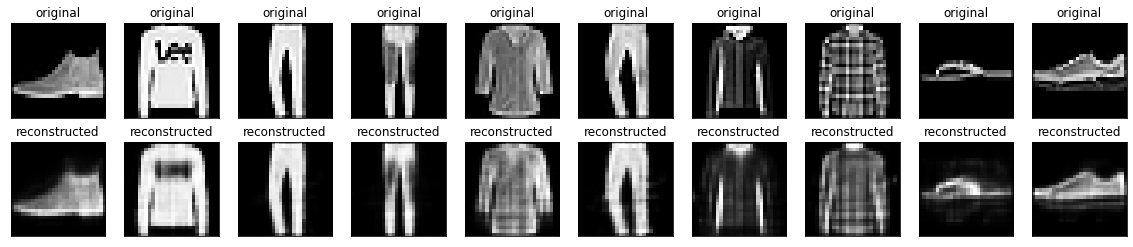

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# 두 번째 예: 이미지 노이즈 제거
autoencoder는 이미지에서 노이즈를 제거하도록 훈련될 수도 있다.

다음 섹션에서는 각 이미지에 임의의 노이즈를 적용하여 Fashion MNIST 데이터 세트의 노이즈 버전을 생성한다.

그런 다음 노이즈가 있는 이미지를 입력으로 사용하고 원본 이미지를 대상으로 사용하여 autoencoder를 훈련한다.

이전에 수정한 내용을 생략하기 위해 데이터세트를 다시 가져오겠다.

In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [13]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train[..., tf.newaxis] # [] 안에 기존의 배열을 ... 으로 적고, 추가하고 싶은 위치에 tf.newaxis를 적어주면 간단히 size 변경이 된다.
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


이미지에 임의의 노이즈를 추가한다.

In [14]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

# clip_by_value()는 Tensor 값을 지정된 최소값과 최대값으로 자르는 데 사용
# 구문: tensorflow.clip_by_value(t, clop_value_min, clip_value_max, name) 매개변수: t

노이즈가 있는 이미지를 플롯합니다.

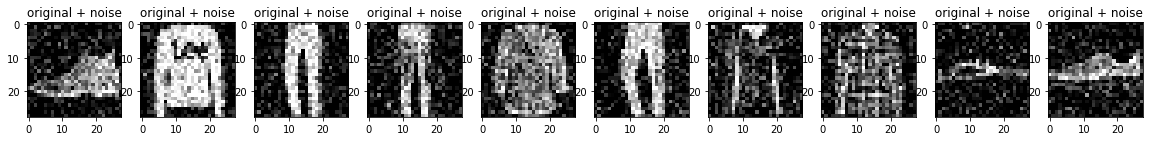

In [15]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('original + noise')
    plt.imshow(tf.squeeze(x_test_noisy[i])) ## 차원을 줄여주는 함수. 크기가 1인 차원만 제거
    plt.gray()
plt.show()

### 컨볼루셔널 autoencoder 정의하기
이 예제에서는 encoder에 Conv2D 레이어를 사용하고 decoder에 Conv2DTranspose 레이어를 사용하여 컨볼루셔널 autoencoder를 훈련한다.

In [16]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
        layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [17]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [18]:
# 압축된 부분(빨간색 부분)
autoencoder.fit(x_train_noisy, x_train,  # 입력은 노이즈, 출력은 원본이미지
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.0170 - val_loss: 0.0095
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

encoder의 요약을 살펴보겠습니다.

이미지가 28x28에서 7x7로 어떻게 다운샘플링되는지 확인하기

In [20]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


decoder는 이미지를 7x7에서 28x28로 다시 업샘플링 한다.

In [21]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


autoencoder에서 생성된 노이즈가 잇는 이미지와 노이즈가 제거된 이미지를 모두 플롯한다.

In [22]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

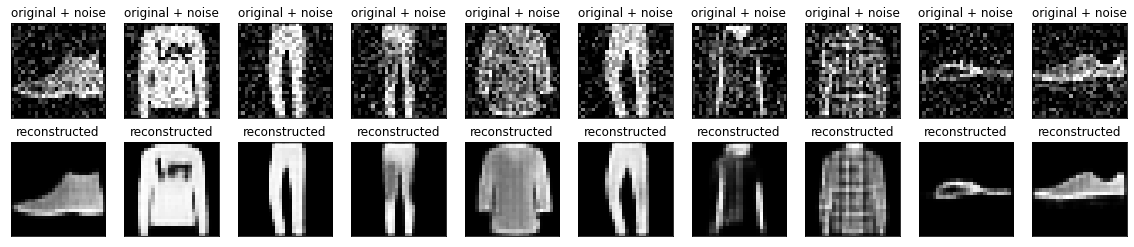

In [23]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original + noise
  ax = plt.subplot(2, n, i+1)
  plt.title('original + noise')
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.title('reconstructed')
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 세 번째 예: 이상 감지

## 개요

이 예에서는 [ECG5000 데이터세트](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000)에서 이상을 감지하도록 autoencoder를 훈련합니다. 이 데이터세트에는 각각 140개의 데이터 포인트가 있는 5,000개의 [심전도](https://en.wikipedia.org/wiki/Electrocardiography)가 포함되어 있습니다. 단순화 된 버전의 데이터세트를 사용하고, 각 예제는 `0`(비정상 리듬에 해당) 또는 `1`(정상 리듬에 해당)으로 레이블이 지정됩니다. 여러분은 비정상 리듬을 식별하는 데 관심이 있습니다.

참고: 레이블이 지정된 데이터세트를 사용하므로 지도 학습 문제라고 표현할 수 있습니다. 이 예의 목표는 사용 가능한 레이블이 없는 더 큰 데이터세트에 적용할 수 있는 이상 감지 개념을 설명하는 것입니다(예: 정상 리듬이 수천 개이고 비정상 리듬이 적은 경우).

autoencoder를 사용하여 이상을 어떻게 감지하겠습니까? autoencoder는 재구성 오류를 최소화하도록 훈련되었습니다. autoencoder는 정상 리듬으로만 훈련한 다음 이 autoencoder를 사용하여 모든 데이터를 재구성합니다. 여기서 가설은 비정상 리듬의 경우에 재구성 오류가 더 클 것이라는 것입니다. 그런 다음 재구성 오류가 고정 임계값을 초과하는 경우, 리듬을 이상으로 분류합니다.

보충 설명 : https://blog.daum.net/ejleep1/1227

### ECG 데이터 로드하기

https://www.tensorflow.org/tutorials/generative/autoencoder?hl=ko

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist

In [25]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [26]:
dataframe.shape

(4998, 141)

In [27]:
dataframe.iloc[:, -1].value_counts()

1.0    2919
0.0    2079
Name: 140, dtype: int64

In [28]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the eletrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

데이터를 [0,1]로 정규화한다.

★ tf.cast 함수에 대해서 알아보자.

텐서를 새로운 형태로 캐스팅하는데 사용한다.

부동소수점형에서 정수형으로 바꾼 경우 소수점 버린을 한다.

Boolean 형태인 경우 True 이면 1, False이면 0을 출력한다.

In [30]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [31]:
train_data.shape

TensorShape([3998, 140])

In [32]:
train_labels.shape

(3998,)

이 데이터세트에서 1로 레이블이 지정된 정상 리듬만 사용하여 autoencoder를 훈련한다.

정상 리듬과 비정상 리듬을 분리한다.

In [52]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [53]:
pd.Series(train_labels).value_counts()

True     2359
False    1639
dtype: int64

In [54]:
normal_train_data.shape

TensorShape([2359, 140])

정상적인 ECG를 플롯한다.

In [55]:
normal_train_data[0]

<tf.Tensor: shape=(140,), dtype=float32, numpy=
array([0.57030463, 0.46561658, 0.29058117, 0.17791584, 0.09538919,
       0.08467858, 0.20195104, 0.3163002 , 0.33732033, 0.41424882,
       0.47070596, 0.4691905 , 0.47767755, 0.4800409 , 0.47027245,
       0.4729927 , 0.47917148, 0.48027468, 0.4692887 , 0.46106863,
       0.46148038, 0.4465829 , 0.45325327, 0.45610094, 0.4489618 ,
       0.4432532 , 0.43402174, 0.44307235, 0.43250525, 0.43014902,
       0.41454658, 0.4120653 , 0.4042028 , 0.41054544, 0.4082913 ,
       0.40342993, 0.39648476, 0.39332044, 0.39158815, 0.39603877,
       0.40746954, 0.4053118 , 0.4173488 , 0.41624558, 0.42334118,
       0.44590637, 0.4455184 , 0.44474098, 0.44404328, 0.45673218,
       0.45217463, 0.4532504 , 0.46082932, 0.46695936, 0.46631944,
       0.4743283 , 0.4629709 , 0.4738895 , 0.46788898, 0.4673448 ,
       0.48026675, 0.4843984 , 0.48574668, 0.48985568, 0.49317348,
       0.4883041 , 0.49913937, 0.5057092 , 0.5078241 , 0.51323026,
       0.52119

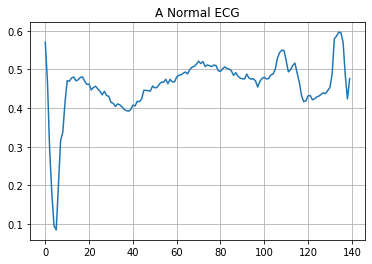

In [56]:
# 위의 출력물을 그래프로 그려보기
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title('A Normal ECG')  # 평균 심전도
plt.show()

비정상적인 ECG를 플롯한다.

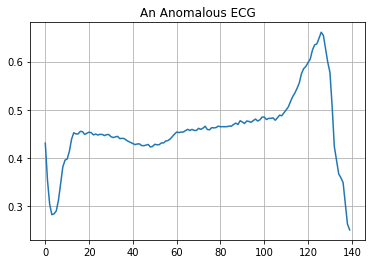

In [57]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title('An Anomalous ECG')
plt.show()

심전도 데이터의 형태를 보면서 표준편차 이상으로 벗어나는걸 정상 비정상으로 판단할 수 있게 된다.

# 모델 빌드하기

In [58]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu')])
    
    self.decoder = tf.keras.Sequential([
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(140, activation='sigmoid')])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [59]:
autoencoder.compile(optimizer = 'adam', loss='mae')

autoencoder는 일반 ECG만 사용하여 훈련되지만, 전체 테스트세트를 사용하여 평가된다.

In [60]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data, test_data),
                          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 31ms/step - loss: 0.0578 - val_loss: 0.0532
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0555 - val_loss: 0.0515
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0521 - val_loss: 0.0496
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0474
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0438 - val_loss: 0.0450
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0397 - val_loss: 0.0430
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0361 - val_loss: 0.0415
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0331 - val_loss: 0.0401
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0306 - val_loss: 0.0387
Epoch 10/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0287 - val_loss: 0.0378
Epoch 11/20
5/5 [=====================

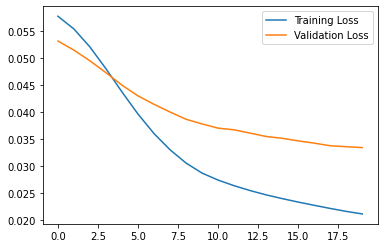

In [61]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

재구성 오류가 정상 훈련 예제에서 하나의 표준편차보다 큰 경우, ECG를 비정상으로 분류한다.

먼저, 훈련 세트의 정상 ECG, autoencoder에 의해 인코딩 및 디코딩된 후의 재구성, 재구성 오류를 플롯해보겠다.

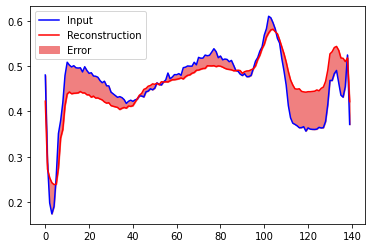

In [62]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=['Input', 'Reconstruction', 'Error'])
plt.show()

이번에는 비정상적인 테스트 예제에서 비슷한 플롯을 만든다.

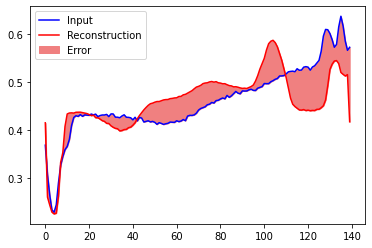

In [64]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=['Input', 'Reconstruction', 'Error'])
plt.show()

# 이상 감지하기
재구성 손실이 고정 임계값보다 큰지 여부를 계산하여 이상을 감지한다.

이 튜토리얼에서는 훈련 세트에서 정상 예제에 대한 평균 오차를 계산한 다음,

재구성 오류가 훈련 세트의 표준편차보다 큰 경우 향후 예제를 비정상적인 것으로 분류한다.

훈련세트에서 정상 ECG에 대한 재구성 오류를 플롯한다.

74/74 [==============================] - 0s 1ms/step


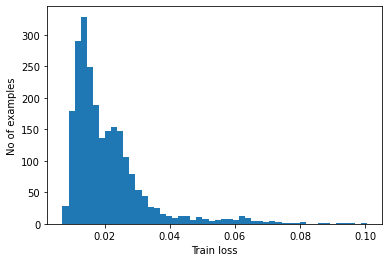

In [65]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel('Train loss')
plt.ylabel('No of examples')
plt.show()

평균보다 표준편차가 높은 임계값을 선택한다.

In [66]:
threshold = np.mean(train_loss) + np.std(train_loss)
print('Threshold: ', threshold)

Threshold:  0.032976553


[참고]

테스트 예제를 이상 항목으로 분류하는 임계값을 선택하는데 사용할 수 잇는 다른 전략이 있다.

올바른 접근 방식은 데이터세트에 따라 다르다.

테스트 세트에서 비정상적인 예제에 대한 재구성 오류를 조사하면 대부분 임계값보다 더 큰 재구성 오류가 있음을 알 수 있다.

임계값을 변경하여 분류자의 정밀도와 재현율을 조정할 수 있다.

14/14 [==============================] - 0s 2ms/step


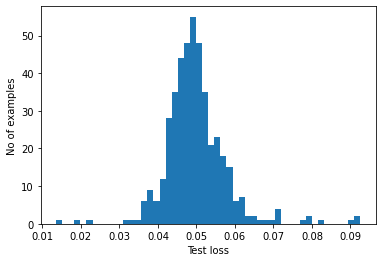

In [67]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.show()

재구성 오류가 임계값보다 큰 경우 ECG를 이상으로 분류한다.

In [68]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print('Accuracy = {}'.format(accuracy_score(labels, preds)))
  print('Precision = {}'.format(precision_score(labels, preds)))
  print('Recall = {}'.format(recall_score(labels, preds)))

In [69]:
preds = predict(autoencoder, test_data, threshold)
print(preds[:10])

tf.Tensor([False False  True  True False False  True  True False  True], shape=(10,), dtype=bool)


In [70]:
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571
